# **Identifying a linear relationship**

Linear models assume that the dependent variables X take a linear relationship with the dependent variable Y. If the assumption is not met, the model may show poor performance. In this work, we will learn how to visualize the linear relationships between X and Y.

In [2]:
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# the dataset for the demo
from sklearn.datasets import fetch_california_housing

# for linear regression
from sklearn.linear_model import LinearRegression

In [4]:
# load the the fetch_california House price data from scikit-learn

# this is how we load the fetch_california dataset from sklearn
fetch_california_housing_dataset = fetch_california_housing()

# create a dataframe with the independent variables
fetch_california = pd.DataFrame(fetch_california_housing_dataset.data,
                      columns=fetch_california_housing_dataset.feature_names)

# add the target
fetch_california['MEDV'] = fetch_california_housing_dataset.target

fetch_california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
# this is the information about the boston house prince dataset
# get familiar with the variables before continuing with
# the notebook

# the aim is to predict the "Median value of the houses"
# MEDV column of this dataset

# and we have variables with characteristics about
# the homes and the neighborhoods

print(fetch_california_housing_dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
# I will create a dataframe with the variable x that
# follows a normal distribution and shows a
# linear relationship with y

# this will provide the expected plots
# i.e., how the plots should look like if the
# linear assumption is met

np.random.seed(29) # for reproducibility

n = 200 # in the book we pass directly 200 within brackets, without defining n
x = np.random.randn(n)
y = x * 10 + np.random.randn(n) * 2

data = pd.DataFrame([x, y]).T
data.columns = ['x', 'y']
data.head()

,x,y
0,-0.417482,-1.271561
1,0.706032,7.990600
2,1.915985,19.848687
3,-2.141755,-21.928903
4,0.719057,5.579070


Linear relationships can be assessed by scatter plots.

Text(0.5, 28.999999999999986, 'Independent variable')

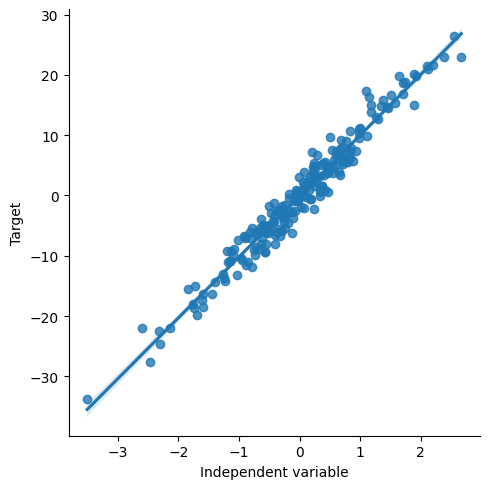

In [7]:
# for the simulated data

# this is how the scatter-plot looks like when
# there is a linear relationship between X and Y

sns.lmplot(x="x", y="y", data=data, order=1)
# order 1 indicates that we want seaborn to
# estimate a linear model (the line in the plot below)
# between x and y

plt.ylabel('Target')
plt.xlabel('Independent variable')

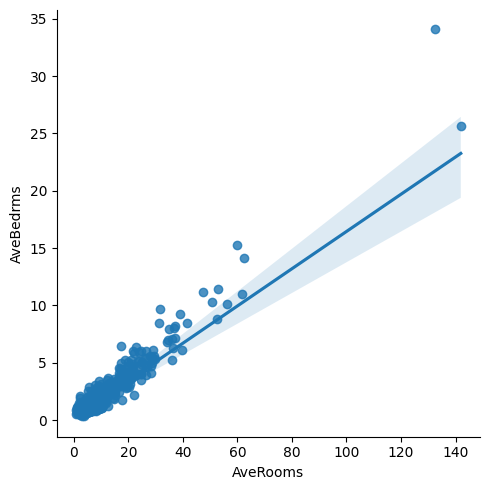

In [22]:
# now we make a scatter plot for the fetch_california
# house price dataset

# we plot the variable AveRooms (average number of rooms per household)
# vs the target AveBedrms (average number of bedrooms per household)

sns.lmplot(x="AveRooms", y="AveBedrms", data=fetch_california, order=1)

Although not perfect, the relationship is fairly linear.

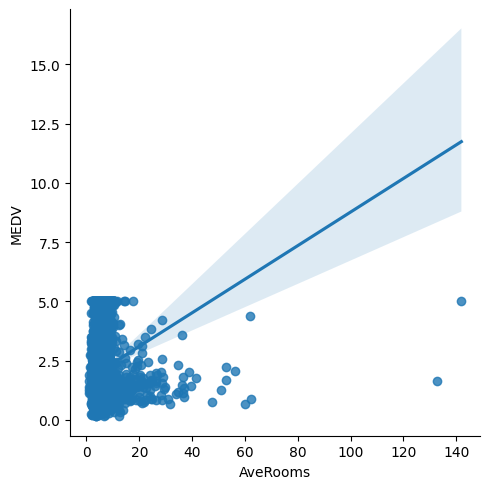

In [24]:
# now we plot AveRooms (average number of rooms per household)
# vs the target MEDV (median value of the house)

sns.lmplot(x="AveRooms", y="MEDV", data=fetch_california, order=1)

Linear relationships can also be assessed by evaluating the residuals. Residuals are the difference between the value estimated by the linear relationship and the real output. If the relationship is linear, the residuals should be normally distributed and centered around zero.

Text(0, 0.5, 'Real value')

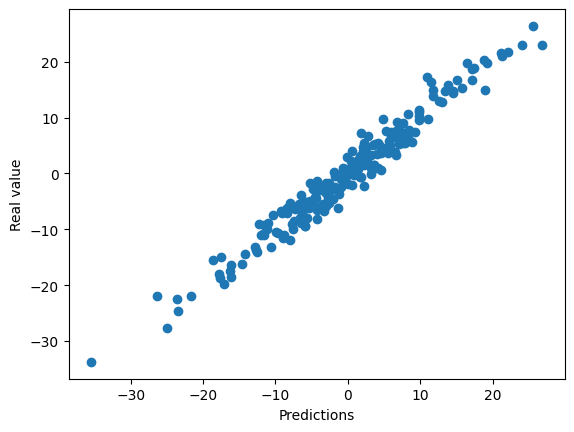

In [25]:
# SIMULATED DATA

# step 1: build a linear model
# call the linear model from sklearn
linreg = LinearRegression()

# fit the model
linreg.fit(data['x'].to_frame(), data['y'])

# step 2: obtain the predictions
# make the predictions
pred = linreg.predict(data['x'].to_frame())

# step 3: calculate the residuals
error = data['y'] - pred

# plot predicted vs real
plt.scatter(x=pred, y=data['y'])
plt.xlabel('Predictions')
plt.ylabel('Real value')

Text(0.5, 0, 'Independent variable x')

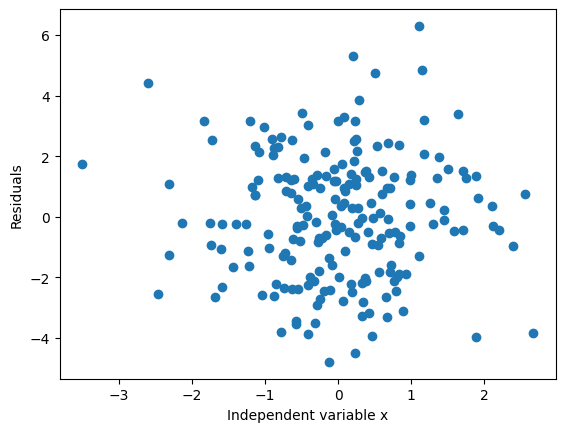

In [26]:
# step 4: observe the distribution of the residuals

# Residuals plot
# if the relationship is linear, the noise should be
# random, centered around zero, and follow a normal distribution

# we plot the error terms vs the independent variable x
# error values should be around 0 and homogeneously distributed

plt.scatter(y=error, x=data['x'])
plt.ylabel('Residuals')
plt.xlabel('Independent variable x')

<ipython-input-27-e74c27dab218>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error, bins=30)


Text(0.5, 0, 'Residuals')

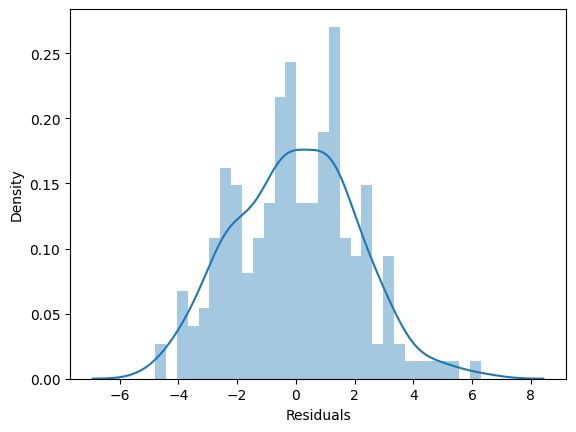

In [27]:
# step 4: observe the distribution of the errors

# plot a histogram of the residuals
# they should follow a gaussian distribution
# centered around 0

sns.distplot(error, bins=30)
plt.xlabel('Residuals')

Text(0, 0.5, 'AveBedrms')

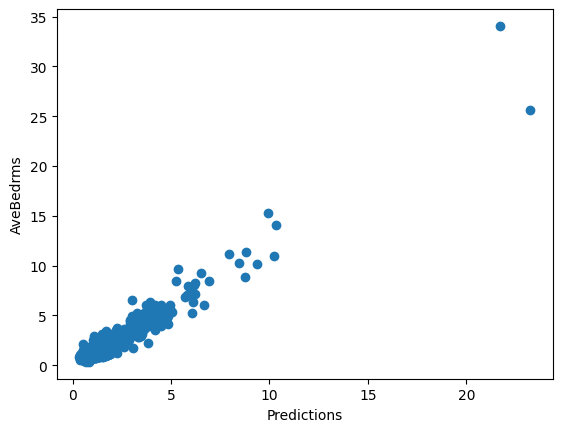

In [28]:
# now we do the same for the variable LSTAT of the fetch_california
# house price dataset from sklearn

# call the linear model from sklearn
linreg = LinearRegression()

# fit the model
linreg.fit(fetch_california['AveRooms'].to_frame(), fetch_california['AveBedrms'])

# make the predictions
pred = linreg.predict(fetch_california['AveRooms'].to_frame())

# calculate the residuals
error = fetch_california['AveBedrms'] - pred

# plot predicted vs real
plt.scatter(x=pred, y=fetch_california['AveBedrms'])
plt.xlabel('Predictions')
plt.ylabel('AveBedrms')

Text(0.5, 0, 'AveRooms')

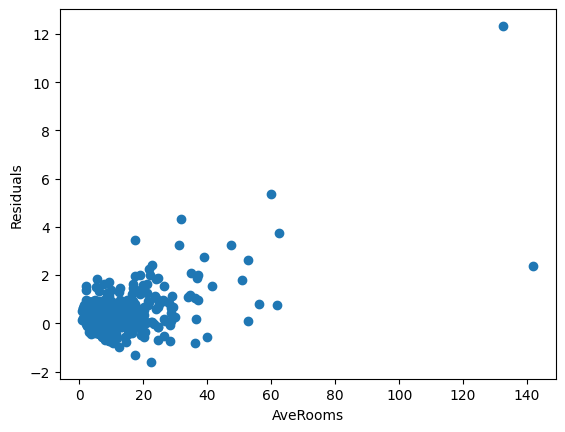

In [29]:
# Residuals plot

# if the relationship is linear, the noise should be
# random, centered around zero, and follow a normal distribution

plt.scatter(y=error, x=fetch_california['AveRooms'])
plt.ylabel('Residuals')
plt.xlabel('AveRooms')

<ipython-input-30-2786d9a8f472>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error, bins=30)


<Axes: xlabel='AveBedrms', ylabel='Density'>

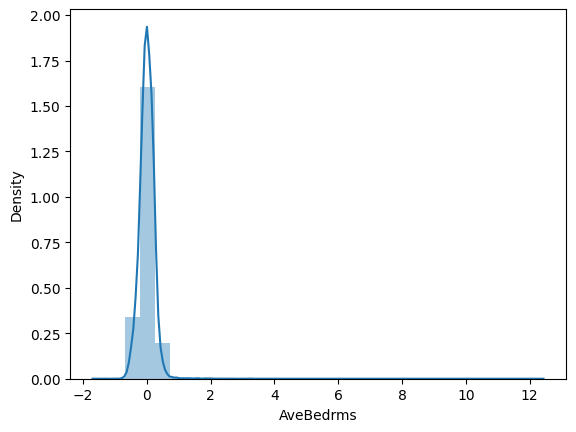

In [30]:
# plot a histogram of the residuals
# they should follow a gaussian distribution
sns.distplot(error, bins=30)